## Predicting Credit Card Default Part II

**Table of Content**
- Introduction
- Importing the Libraries
- Data Preprocessing and Exploration
- Building the Algorithms
- Running GridSearch/RandomSearch (Random Forest, Support Vector Machine, Logistic Regression, Decision Tree, K-Nearesr Neigbnbor, Naive Bayes, Ada Boost, Gradient Boosting, Bagging, Stacking, Artificial Neural Network)
- Feature Selection using Step Forward Feature Selection
- Features Importance and Analysis
- Analysis of Coefficients
- Predicting Probabilities of Default of a Single borrower and Class (X_test)

### Introduction

This is a continuation of Part I. Link to Part I can be found here [Part I](https://github.com/adiari1/ML-Projects/blob/master/Credit%20Card%20Default%20Prediction%20Part%20I.ipynb)

This project seeks to accurately predict credit card default in the next period (next month). The dataset comprises credit card information of Taiwanese credit card holders and downloaded from UCI Machine Learning Repository. The dependent variable is a categorical variable, assigned 1 if there is default and 0 if no default. Details of the description of the dataset and attributes can be found on UCI website [UCI](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
import scikitplot as skplt
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn import preprocessing, metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel

## Data Preprocessing and Exploration

In [2]:
data = pd.read_csv('default of credit card clients.csv', skiprows=1)

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
data = data.drop(["ID"],axis=1)

In [6]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


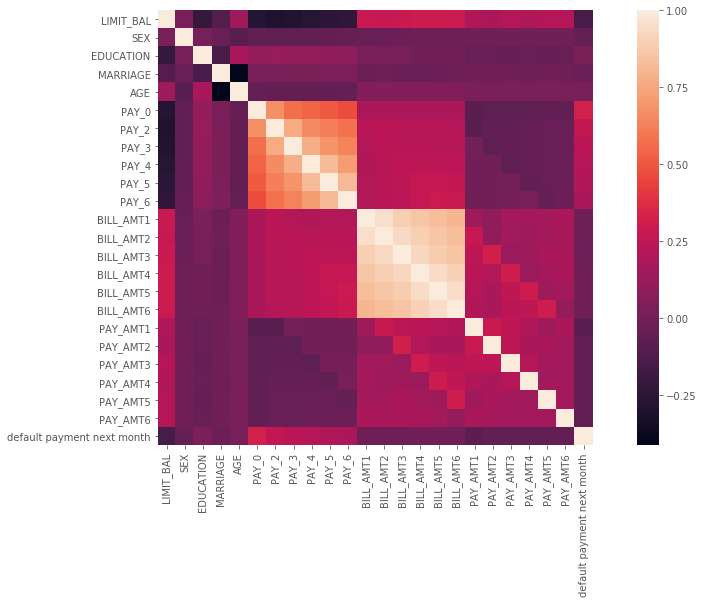

In [7]:
plt.rcParams['figure.figsize']=(16,8)
plt.style.use('ggplot')
cormat = data.corr()
sns.heatmap(cormat, square=True);

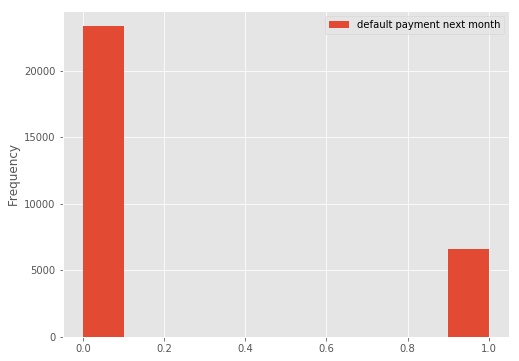

In [8]:
# Checking for Data Distribution and imbalanced data
data[["default payment next month"]].plot(kind="hist",figsize=(8,6))

In [9]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [10]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)
from collections import Counter

In [11]:
print(sorted(Counter(y_resampled).items()))

[(0, 23364), (1, 23364)]


In [12]:
X_resampled.shape, y_resampled.shape

((46728, 23), (46728,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=123)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35046, 23), (11682, 23), (35046,), (11682,))

### Scaling the Features

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the Algorithms

In [22]:
clf1 = KNeighborsClassifier()
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr, use_features_in_secondary=True)

In [23]:
# Dictionary of different classifiers
clfs = {
'LogisticRegression' : LogisticRegression(),
'DecisionTree': DecisionTreeClassifier(),
'KNNClassifier': KNeighborsClassifier(),
'NaiveBayes': GaussianNB(),
'SupportVectorMachines': SVC(kernel="rbf"),
'Bagging': BaggingClassifier(),
'AdaBoostClassifier': AdaBoostClassifier(),
'RandomForestClassifier': RandomForestClassifier(),
'GradientBoostingClassifier': GradientBoostingClassifier(),
'XGBoost': XGBClassifier(),
'StackingClassifier': StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr, use_features_in_secondary=True)
}

In [24]:
# Testing all clfs models and generating a report
models_report = pd.DataFrame(columns = ['Model', 'Accuracy','Precision_score', 'Recall_score','F1_score', 'AUC'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred),
                     'AUC': metrics.roc_auc_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report

,Model,Accuracy,Precision_score,Recall_score,F1_score,AUC
0,LogisticRegression,0.671888,0.693843,0.629166,0.659924,0.672407
1,DecisionTree,0.876562,0.825113,0.959398,0.887203,0.875557
2,KNNClassifier,0.743366,0.715045,0.819320,0.763639,0.742445
3,NaiveBayes,0.604349,0.576571,0.821012,0.677415,0.601721
4,SupportVectorMachines,0.719569,0.796667,0.598545,0.683539,0.721037
5,Bagging,0.918250,0.894837,0.950093,0.921638,0.917864
6,AdaBoostClassifier,0.704503,0.762433,0.604297,0.674217,0.705718
7,RandomForestClassifier,0.920305,0.898018,0.950431,0.923482,0.919939
8,GradientBoostingClassifier,0.723849,0.772257,0.644223,0.702453,0.724814
9,XGBoost,0.723677,0.771394,0.645069,0.702598,0.724631


- Performance improvements observed after boosting the undersampled class through resampling
- Also, performance across the algorithms witnessed significant improvements after tuning the hyperparameters (see below) 
- Pls note RandomizedSearchCV was substituted for GridSearchCV in some of the algorithms because the latter is more computationally expensive and took extremely a very long time for some of the algorithms.

## Running GridSearch/RandomSearch

### Random Forest

In [25]:
rf = RandomForestClassifier()
rf_params = {'n_estimators': np.arange(50,500,50)}
rf_grid = RandomizedSearchCV(rf, param_distributions=rf_params, refit=True)
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)
#svm_nested_score = cross_val_score(svm_grid, X, y, cv=3)

In [26]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_rf)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_rf)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_rf)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_rf)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_rf)))
rf_grid.best_params_

Accuracy Score is 0.932974
Precision Score is 0.909192
Recall Score is 0.963796
F1_score is 0.935698
AUC Score is 0.932600


{'n_estimators': 400}

In [27]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      5771
           1       0.91      0.96      0.94      5911

   micro avg       0.93      0.93      0.93     11682
   macro avg       0.93      0.93      0.93     11682
weighted avg       0.93      0.93      0.93     11682



In [28]:
print(confusion_matrix(y_test, y_pred_rf))

[[5202  569]
 [ 214 5697]]


In [29]:
print ('Best params: ', rf_grid.best_params_)
print ('Best Param Score: ', rf_grid.best_score_)
print ('Best Accuracy on Test set: ', rf_grid.score(X_test, y_test))

Best params:  {'n_estimators': 400}
Best Param Score:  0.8936825885978429
Best Accuracy on Test set:  0.9329738058551618


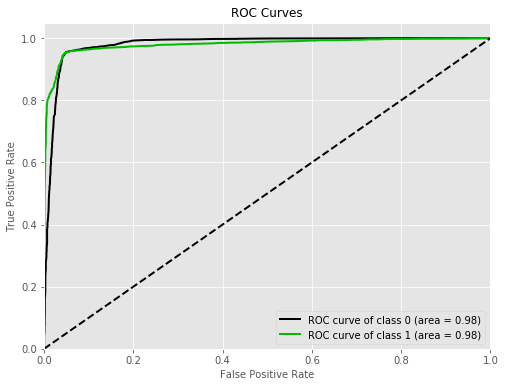

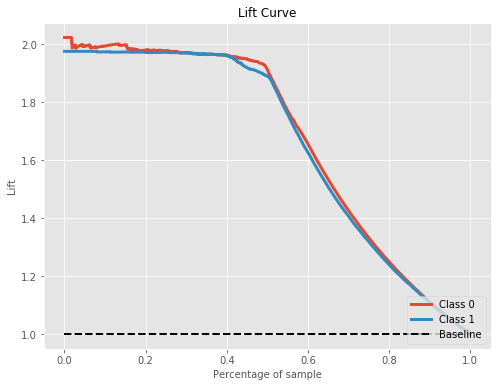

In [32]:
rf = RandomForestClassifier(n_estimators=450)
rf = rf.fit(X_train, y_train)
y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

rf = RandomForestClassifier(n_estimators=450)
rf = rf.fit(X_train, y_train)
y_probas = rf.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Support Vector Machines

In [33]:
svm = SVC(kernel='rbf')
svm_params = {'C': [0.1,100,1000], 'gamma':[0.001,0.01,10]}
#svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid = RandomizedSearchCV(svm, param_distributions=svm_params, refit=True, cv=3)
svm_grid.fit(X_train, y_train)
y_pred_svm = svm_grid.predict(X_test)

In [34]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_svm)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_svm)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_svm)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_svm)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_svm)))
svm_grid.best_params_

Accuracy Score is 0.944359
Precision Score is 0.952209
Recall Score is 0.937066
F1_score is 0.944577
AUC Score is 0.944447


{'gamma': 10, 'C': 1000}

In [35]:
print(confusion_matrix(y_test, y_pred_svm))

[[5493  278]
 [ 372 5539]]


In [123]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      5771
           1       0.95      0.94      0.94      5911

   micro avg       0.94      0.94      0.94     11682
   macro avg       0.94      0.94      0.94     11682
weighted avg       0.94      0.94      0.94     11682



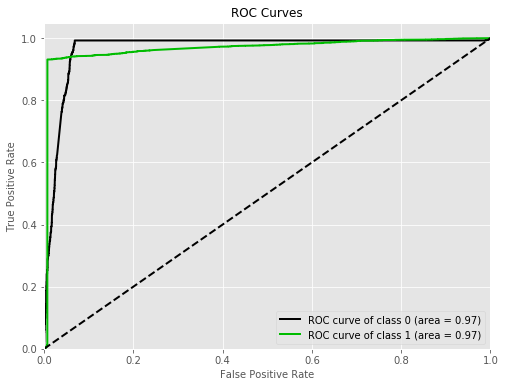

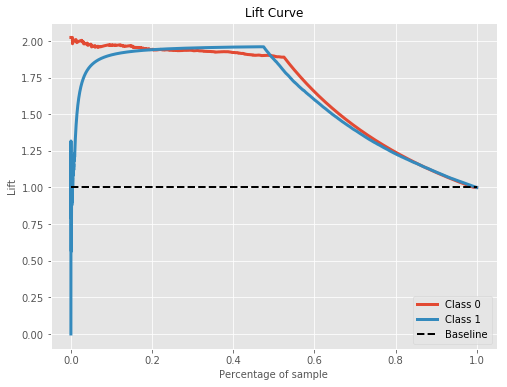

In [36]:
svm = SVC(kernel='rbf',gamma=10, C=1000, probability=True)
svm = svm.fit(X_train, y_train)
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

svm = SVC(kernel='rbf',gamma=10, C=1000, probability=True)
svm = svm.fit(X_train, y_train)
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Logistic Regression

In [37]:
lr = LogisticRegression()
lr_params = {'C': [0.1, 10.0, 100, 1000]}
lr_grid = GridSearchCV(lr, lr_params, cv=5)
lr_grid.fit(X_train, y_train)
y_pred_lr = lr_grid.predict(X_test)
lr_nested_score = cross_val_score(lr_grid, X, y, cv=5)

In [38]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_lr)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_lr)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_lr)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_lr)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_lr)))
lr_grid.best_params_

Accuracy Score is 0.671888
Precision Score is 0.693843
Recall Score is 0.629166
F1_score is 0.659924
AUC Score is 0.672407


{'C': 10.0}

In [39]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(lr_nested_score.mean(), lr_nested_score.std()))

mean of 0.778767 with std. dev. of 0.000116.


In [40]:
print(confusion_matrix(y_test, y_pred_lr))

[[4130 1641]
 [2192 3719]]


In [124]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68      5771
           1       0.69      0.63      0.66      5911

   micro avg       0.67      0.67      0.67     11682
   macro avg       0.67      0.67      0.67     11682
weighted avg       0.67      0.67      0.67     11682



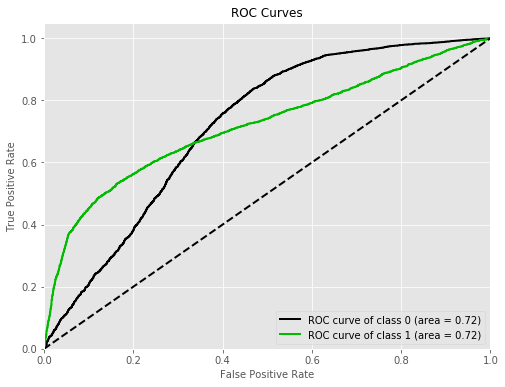

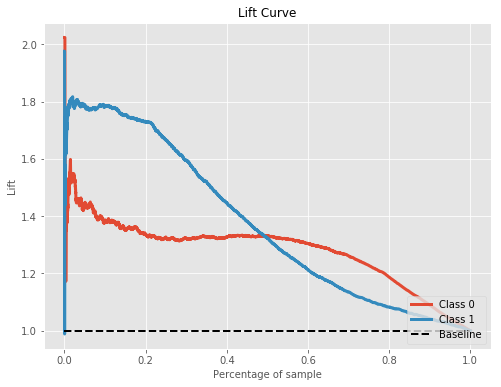

In [41]:
lr = LogisticRegression(C=10)
lr = lr.fit(X_train, y_train)
y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

lr = LogisticRegression(C=10)
lr = lr.fit(X_train, y_train)
y_probas = lr.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Decision Tree

In [42]:
dt = DecisionTreeClassifier()
dt_params = {'max_depth': np.arange(3,9,1),'min_samples_split':np.arange(2,9,1),'min_samples_leaf':np.arange(1,9,1)}
dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(X_train, y_train)
y_pred_dt = dt_grid.predict(X_test)
dt_nested_score = cross_val_score(dt_grid, X, y, cv=5)

In [43]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_dt)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_dt)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_dt)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_dt)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_dt)))
dt_grid.best_params_

Accuracy Score is 0.720339
Precision Score is 0.759827
Recall Score is 0.654035
F1_score is 0.702973
AUC Score is 0.721143


{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [44]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(dt_nested_score.mean(), dt_nested_score.std()))

mean of 0.820334 with std. dev. of 0.008682.


In [45]:
print(confusion_matrix(y_test, y_pred_dt))

[[4549 1222]
 [2045 3866]]


In [125]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      5771
           1       0.76      0.65      0.70      5911

   micro avg       0.72      0.72      0.72     11682
   macro avg       0.72      0.72      0.72     11682
weighted avg       0.73      0.72      0.72     11682



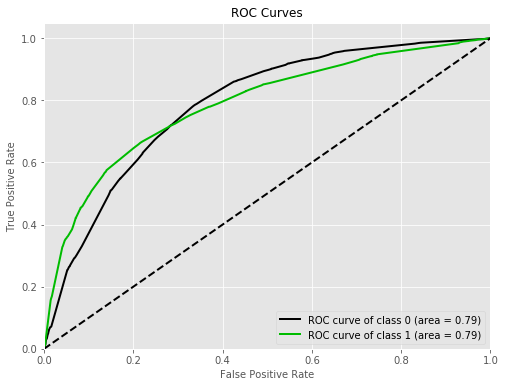

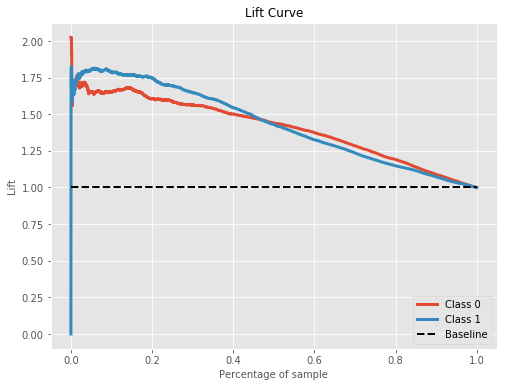

In [46]:
dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, min_samples_split=4)
dt = dt.fit(X_train, y_train)
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=1, min_samples_split=4)
dt = dt.fit(X_train, y_train)
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### K-Nearest Neigbor (KNN)

In [47]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': np.arange(2,15,1), 'leaf_size':np.arange(3,15,1)}
knn_grid = RandomizedSearchCV(knn, param_distributions=knn_params, cv=3)
knn_grid.fit(X_train, y_train)
y_pred_knn = knn_grid.predict(X_test)
#knn_nested_score = cross_val_score(knn_grid, X, y, cv=3)

In [48]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_knn)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_knn)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_knn)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_knn)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_knn)))
knn_grid.best_params_

Accuracy Score is 0.825886
Precision Score is 0.819832
Recall Score is 0.840636
F1_score is 0.830104
AUC Score is 0.825707


{'n_neighbors': 2, 'leaf_size': 8}

In [49]:
#print("mean of {0:6f} with std. dev. of {1:6f}.".format(knn_nested_score.mean(), knn_nested_score.std()))

In [50]:
print(confusion_matrix(y_test, y_pred_knn))

[[4679 1092]
 [ 942 4969]]


In [126]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      5771
           1       0.82      0.84      0.83      5911

   micro avg       0.83      0.83      0.83     11682
   macro avg       0.83      0.83      0.83     11682
weighted avg       0.83      0.83      0.83     11682



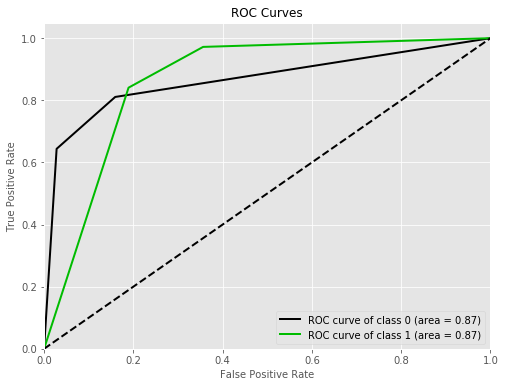

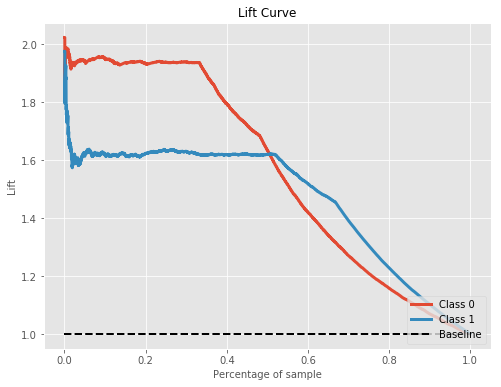

In [127]:
knn = KNeighborsClassifier(n_neighbors=2, leaf_size=8)
knn = knn.fit(X_train, y_train)
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

knn = KNeighborsClassifier(n_neighbors=2, leaf_size=8)
knn = knn.fit(X_train, y_train)
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Naive Bayes

In [52]:
nb = GaussianNB()
nb_params = {'var_smoothing': [1e-10, 1e-09, 1e-08]}
nb_grid = GridSearchCV(nb, nb_params, cv=3)
nb_grid.fit(X_train, y_train)
y_pred_nb = nb_grid.predict(X_test)
nb_nested_score = cross_val_score(nb_grid, X, y, cv=3)

In [53]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_nb)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_nb)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_nb)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_nb)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_nb)))
nb_grid.best_params_

Accuracy Score is 0.604349
Precision Score is 0.576571
Recall Score is 0.821012
F1_score is 0.677415
AUC Score is 0.601721


{'var_smoothing': 1e-10}

In [54]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(nb_nested_score.mean(), nb_nested_score.std()))

mean of 0.533067 with std. dev. of 0.057883.


In [55]:
print(confusion_matrix(y_test, y_pred_nb))

[[2207 3564]
 [1058 4853]]


In [128]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.68      0.38      0.49      5771
           1       0.58      0.82      0.68      5911

   micro avg       0.60      0.60      0.60     11682
   macro avg       0.63      0.60      0.58     11682
weighted avg       0.63      0.60      0.58     11682



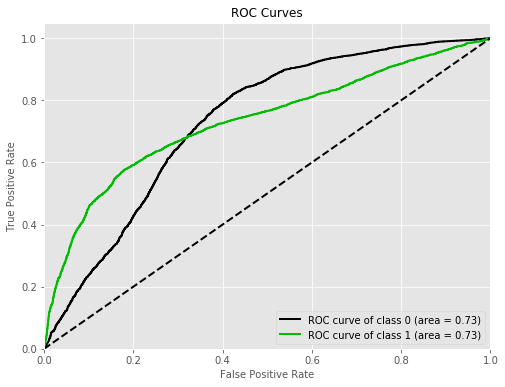

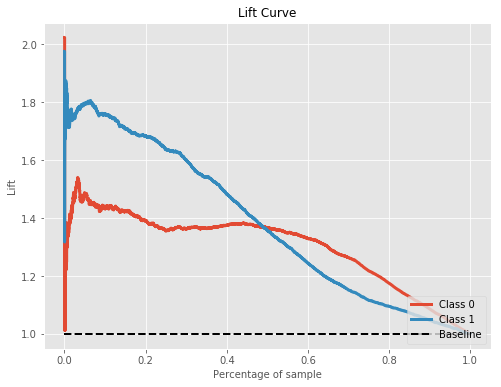

In [56]:
nb = GaussianNB(var_smoothing=1e-10)
nb = nb.fit(X_train, y_train)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

nb = GaussianNB(var_smoothing=1e-10)
nb = nb.fit(X_train, y_train)
y_probas = nb.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### AdaBoost

In [57]:
ab = AdaBoostClassifier()
ab_params = {'n_estimators': np.arange(50,350,50),'learning_rate':np.arange(0.4,1.4,0.2)}
ab_grid = GridSearchCV(ab, ab_params, cv=3)
ab_grid.fit(X_train, y_train)
y_pred_ab = ab_grid.predict(X_test)
ab_nested_score = cross_val_score(ab_grid, X, y, cv=3)

In [58]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_ab)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_ab)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_ab)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_ab)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_ab)))
ab_grid.best_params_

Accuracy Score is 0.711693
Precision Score is 0.754861
Recall Score is 0.637117
F1_score is 0.691009
AUC Score is 0.712598


{'learning_rate': 1.2000000000000002, 'n_estimators': 300}

In [68]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(ab_nested_score.mean(), ab_nested_score.std()))

mean of 0.818200 with std. dev. of 0.006932.


In [60]:
print(confusion_matrix(y_test, y_pred_ab))

[[4548 1223]
 [2145 3766]]


In [129]:
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73      5771
           1       0.75      0.64      0.69      5911

   micro avg       0.71      0.71      0.71     11682
   macro avg       0.72      0.71      0.71     11682
weighted avg       0.72      0.71      0.71     11682



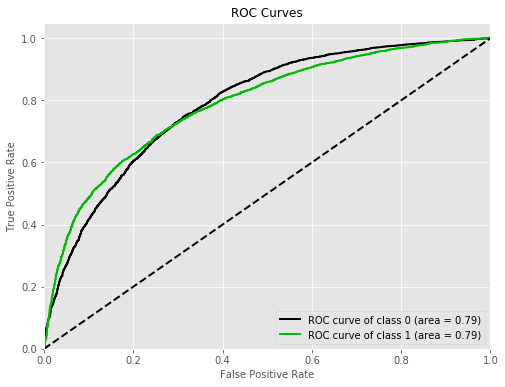

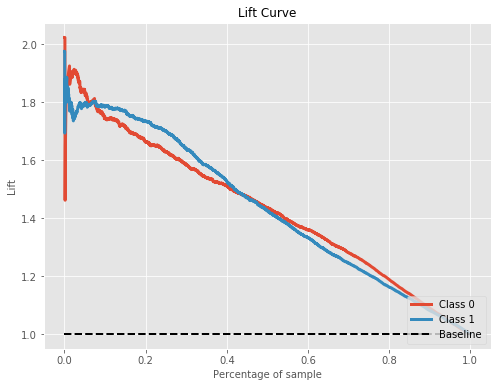

In [61]:
ab = AdaBoostClassifier(learning_rate=1.2000000000000002, n_estimators=300)
ab = ab.fit(X_train, y_train)
y_probas = ab.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

ab = AdaBoostClassifier(learning_rate=1.2000000000000002, n_estimators=300)
ab = ab.fit(X_train, y_train)
y_probas = ab.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Gradient Boosting

In [62]:
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': np.arange(100,500,100),'learning_rate' : np.arange(0.01,0.1,0.02), 'max_depth':np.arange(3,9,2)}
#gb_grid = GridSearchCV(gb, gb_params, cv=5)
gb_grid = RandomizedSearchCV(gb, param_distributions=gb_params, refit=True)
gb_grid.fit(X_train, y_train)
y_pred_gb = gb_grid.predict(X_test)
#gb_nested_score = cross_val_score(gb_grid, X, y, cv=5)

In [63]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_gb)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_gb)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_gb)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_gb)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_gb)))
gb_grid.best_params_

Accuracy Score is 0.802174
Precision Score is 0.820057
Recall Score is 0.780240
F1_score is 0.799653
AUC Score is 0.802440


{'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.06999999999999999}

In [69]:
print(confusion_matrix(y_test, y_pred_gb))

[[4759 1012]
 [1299 4612]]


In [130]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      5771
           1       0.82      0.78      0.80      5911

   micro avg       0.80      0.80      0.80     11682
   macro avg       0.80      0.80      0.80     11682
weighted avg       0.80      0.80      0.80     11682



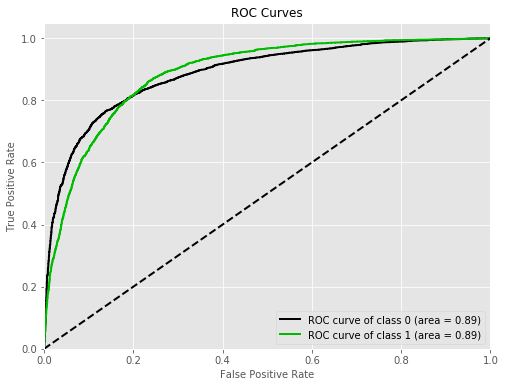

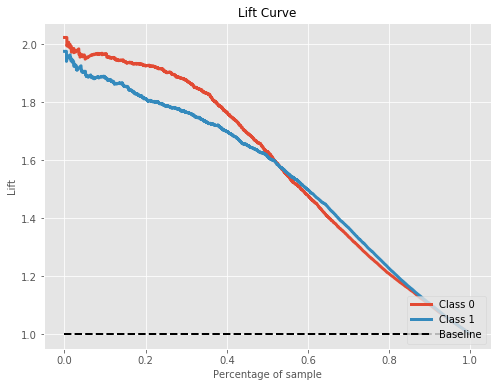

In [131]:
gb = GradientBoostingClassifier(learning_rate=0.06999999999999999, n_estimators=200, max_depth= 7)
gb = gb.fit(X_train, y_train)
y_probas = gb.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

gb = GradientBoostingClassifier(learning_rate=0.06999999999999999, n_estimators=200, max_depth= 7)
gb = gb.fit(X_train, y_train)
y_probas = gb.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Bagging

In [67]:
#bg.get_params().keys()

In [71]:
bg = BaggingClassifier()
bg_params = {'n_estimators': np.arange(4,20,2)}
bg_grid = GridSearchCV(bg, bg_params, cv=5)
bg_grid.fit(X_train, y_train)
y_pred_bg = bg_grid.predict(X_test)
bg_nested = cross_val_score(bg_grid, X, y, cv=5)

In [72]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_bg)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_bg)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_bg)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_bg)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_bg)))
bg_grid.best_params_

Accuracy Score is 0.922616
Precision Score is 0.896940
Recall Score is 0.957029
F1_score is 0.926011
AUC Score is 0.922199


{'n_estimators': 18}

In [134]:
#bg_nested

In [74]:
print("mean of {0:6f} with std. dev. of {1:6f}.".format(bg_nested.mean(), bg_nested.std()))

mean of 0.809201 with std. dev. of 0.009321.


In [75]:
print(confusion_matrix(y_test, y_pred_bg))

[[5121  650]
 [ 254 5657]]


In [132]:
print(classification_report(y_test, y_pred_bg))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      5771
           1       0.90      0.96      0.93      5911

   micro avg       0.92      0.92      0.92     11682
   macro avg       0.92      0.92      0.92     11682
weighted avg       0.92      0.92      0.92     11682



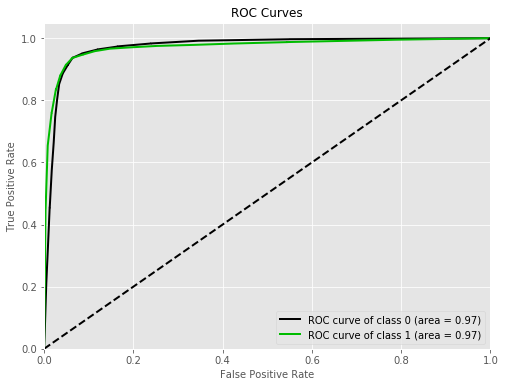

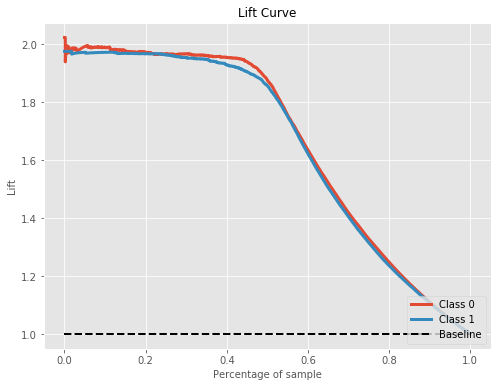

In [76]:
bg = BaggingClassifier(n_estimators=18)
bg = bg.fit(X_train, y_train)
y_probas = bg.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

bg = BaggingClassifier(n_estimators=18)
bg = bg.fit(X_train, y_train)
y_probas = bg.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Stacking Classifier

In [112]:
clf1 = SVC(kernel='rbf', gamma=10, C=1000)
clf2 = GradientBoostingClassifier(n_estimators=200, max_depth=7, learning_rate=0.06999999999999999)
clf3 = BaggingClassifier(n_estimators=18)
rf = RandomForestClassifier(n_estimators=400)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=rf, use_features_in_secondary=True)
sclf.fit(X_train, y_train)
y_pred_sclf = bg_grid.predict(X_test)

In [113]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_sclf)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_sclf)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_sclf)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_sclf)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_sclf)))

Accuracy Score is 0.922616
Precision Score is 0.896940
Recall Score is 0.957029
F1_score is 0.926011
AUC Score is 0.922199


In [114]:
print(confusion_matrix(y_test, y_pred_sclf))

[[5121  650]
 [ 254 5657]]


In [116]:
print(classification_report(y_test, y_pred_sclf))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      5771
           1       0.90      0.96      0.93      5911

   micro avg       0.92      0.92      0.92     11682
   macro avg       0.92      0.92      0.92     11682
weighted avg       0.92      0.92      0.92     11682



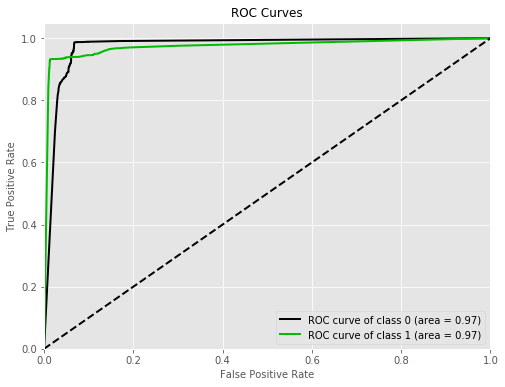

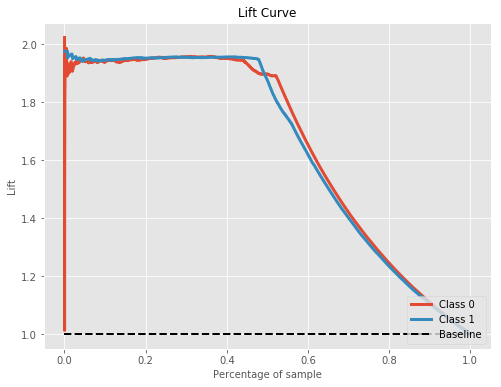

In [117]:
clf1 = SVC(kernel='rbf', gamma=10, C=1000, probability=True)
clf2 = GradientBoostingClassifier(n_estimators=200, max_depth=7, learning_rate=0.06999999999999999)
clf3 = BaggingClassifier(n_estimators=18)
rf = RandomForestClassifier(n_estimators=400)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=rf, use_features_in_secondary=True)
sclf = sclf.fit(X_train, y_train)
y_probas = sclf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, plot_micro=False, plot_macro=False,figsize=(8,6))

clf1 = SVC(kernel='rbf', gamma=10, C=1000, probability=True)
clf2 = GradientBoostingClassifier(n_estimators=200, max_depth=7, learning_rate=0.06999999999999999)
clf3 = BaggingClassifier(n_estimators=18)
rf = RandomForestClassifier(n_estimators=400)
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=rf, use_features_in_secondary=True)
sclf = sclf.fit(X_train, y_train)
y_probas = sclf.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, y_probas,figsize=(8,6))

plt.show()

### Artificial Neural Network (ANN)

In [81]:
# Importing Keras libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, GRU, Bidirectional

Using TensorFlow backend.


In [82]:
#Initializing the Neural Network
classifier = Sequential()

In [83]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 216, init = 'uniform', activation = 'relu', input_dim = 23))
#classifier.add(Dropout(0.2))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 216, init = 'uniform', activation = 'relu'))
#classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 216, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

In [84]:
# Compiling the Neural Network
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [85]:
# Fitting the Model 
classifier.fit(X_train, y_train, batch_size = 16, nb_epoch = 50)

Epoch 1/50
35046/35046 [==============================] - 9s - loss: 0.5805 - acc: 0.6970     
Epoch 2/50
35046/35046 [==============================] - 8s - loss: 0.5626 - acc: 0.7096     
Epoch 3/50
35046/35046 [==============================] - 8s - loss: 0.5557 - acc: 0.7125     
Epoch 4/50
35046/35046 [==============================] - 8s - loss: 0.5484 - acc: 0.7181     
Epoch 5/50
35046/35046 [==============================] - 8s - loss: 0.5413 - acc: 0.7213     
Epoch 6/50
35046/35046 [==============================] - 8s - loss: 0.5338 - acc: 0.7260     
Epoch 7/50
35046/35046 [==============================] - 8s - loss: 0.5261 - acc: 0.7319     
Epoch 8/50
35046/35046 [==============================] - 8s - loss: 0.5165 - acc: 0.7392     
Epoch 9/50
35046/35046 [==============================] - 8s - loss: 0.5060 - acc: 0.7471     
Epoch 10/50
35046/35046 [==============================] - 8s - loss: 0.4954 - acc: 0.7516     
Epoch 11/50
35046/35046 [========================

In [86]:
# Predicting the Test set
y_pred_nn = classifier.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5)

In [87]:
# The Confusion Matrix
print(confusion_matrix(y_test, y_pred_nn))

[[4628 1143]
 [ 899 5012]]


In [133]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      5771
           1       0.81      0.85      0.83      5911

   micro avg       0.83      0.83      0.83     11682
   macro avg       0.83      0.82      0.83     11682
weighted avg       0.83      0.83      0.83     11682



In [88]:
print("Accuracy Score is {0:6f}".format(metrics.accuracy_score(y_test, y_pred_nn)))
print("Precision Score is {0:6f}".format(metrics.precision_score(y_test, y_pred_nn)))
print("Recall Score is {0:6f}".format(metrics.recall_score(y_test, y_pred_nn)))
print("F1_score is {0:6f}".format(metrics.f1_score(y_test, y_pred_nn)))
print("AUC Score is {0:6f}".format(metrics.roc_auc_score(y_test, y_pred_nn)))

Accuracy Score is 0.825201
Precision Score is 0.814297
Recall Score is 0.847911
F1_score is 0.830764
AUC Score is 0.824926


## Feature Selection using Step Forward Feature Selection

In [89]:
from sklearn.metrics import accuracy_score as acc
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [90]:
# Build RF classifier to use in feature selection
clf = BaggingClassifier(n_estimators=18)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=15,
           forward=True, # Otherwise, this will be the backward selection 
           floating=False,
           n_jobs=10, # The number of CPUs to use for evaluating 
           verbose=2,
           scoring='accuracy',
           cv=3)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  16 out of  23 | elapsed:   43.6s remaining:   19.0s
[Parallel(n_jobs=10)]: Done  23 out of  23 | elapsed:   45.1s finished

[2019-01-10 22:01:48] Features: 1/15 -- score: 0.7345204240088918[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  15 out of  22 | elapsed:   30.6s remaining:   14.2s
[Parallel(n_jobs=10)]: Done  22 out of  22 | elapsed:   34.9s finished

[2019-01-10 22:02:23] Features: 2/15 -- score: 0.7896480734958932[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  13 out of  21 | elapsed:   26.6s remaining:   16.3s
[Parallel(n_jobs=10)]: Done  21 out of  21 | elapsed:   31.5s finished

[2019-01-10 22:02:55] Features: 3/15 -- score: 0.8340179684536362[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 out of

In [91]:
# Candidate features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 3, 4, 5, 6, 8, 9, 11, 14, 16, 17, 19, 20, 21, 22]


In [92]:
sfs1.subsets_

{1: {'feature_idx': (11,),
  'cv_scores': array([0.73551314, 0.72975518, 0.73829295]),
  'avg_score': 0.7345204240088918,
  'feature_names': ('11',)},
 2: {'feature_idx': (5, 11),
  'cv_scores': array([0.78421638, 0.79412772, 0.79060012]),
  'avg_score': 0.7896480734958932,
  'feature_names': ('5', '11')},
 3: {'feature_idx': (5, 11, 14),
  'cv_scores': array([0.83582984, 0.8366718 , 0.82955226]),
  'avg_score': 0.8340179684536362,
  'feature_names': ('5', '11', '14')},
 4: {'feature_idx': (5, 11, 14, 16),
  'cv_scores': array([0.85234957, 0.85447697, 0.85420769]),
  'avg_score': 0.8536780761890074,
  'feature_names': ('5', '11', '14', '16')},
 5: {'feature_idx': (4, 5, 11, 14, 16),
  'cv_scores': array([0.85945391, 0.86141072, 0.86234055]),
  'avg_score': 0.8610683925881885,
  'feature_names': ('4', '5', '11', '14', '16')},
 6: {'feature_idx': (0, 4, 5, 11, 14, 16),
  'cv_scores': array([0.86869811, 0.86500599, 0.87021659]),
  'avg_score': 0.8679735638441674,
  'feature_names': ('0', 

In [93]:
feature_names = ('LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 
                 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5','BILL_AMT6', 'PAY_AMT1', 
                 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6')
sfs1 = sfs1.fit(X_train, y_train, custom_feature_names=feature_names)
sfs1.subsets_

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  16 out of  23 | elapsed:   15.3s remaining:    6.6s
[Parallel(n_jobs=10)]: Done  23 out of  23 | elapsed:   18.2s finished

[2019-01-10 22:14:06] Features: 1/15 -- score: 0.7348913577345249[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  15 out of  22 | elapsed:   31.3s remaining:   14.6s
[Parallel(n_jobs=10)]: Done  22 out of  22 | elapsed:   36.2s finished

[2019-01-10 22:14:42] Features: 2/15 -- score: 0.7883640614443038[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  13 out of  21 | elapsed:   27.4s remaining:   16.8s
[Parallel(n_jobs=10)]: Done  21 out of  21 | elapsed:   31.6s finished

[2019-01-10 22:15:14] Features: 3/15 -- score: 0.834617232216555[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  12 out of 

{1: {'feature_idx': (11,),
  'cv_scores': array([0.73654027, 0.72907036, 0.73906344]),
  'avg_score': 0.7348913577345249,
  'feature_names': ('BILL_AMT1',)},
 2: {'feature_idx': (5, 11),
  'cv_scores': array([0.78413079, 0.78993323, 0.79102817]),
  'avg_score': 0.7883640614443038,
  'feature_names': ('PAY_0', 'BILL_AMT1')},
 3: {'feature_idx': (5, 11, 14),
  'cv_scores': array([0.83608662, 0.83615819, 0.83160688]),
  'avg_score': 0.834617232216555,
  'feature_names': ('PAY_0', 'BILL_AMT1', 'BILL_AMT4')},
 4: {'feature_idx': (4, 5, 11, 14),
  'cv_scores': array([0.85303432, 0.85139531, 0.8505265 ]),
  'avg_score': 0.8516520428058164,
  'feature_names': ('AGE', 'PAY_0', 'BILL_AMT1', 'BILL_AMT4')},
 5: {'feature_idx': (0, 4, 5, 11, 14),
  'cv_scores': array([0.86236412, 0.86355076, 0.86002911]),
  'avg_score': 0.8619813292526478,
  'feature_names': ('LIMIT_BAL', 'AGE', 'PAY_0', 'BILL_AMT1', 'BILL_AMT4')},
 6: {'feature_idx': (0, 4, 5, 11, 14, 22),
  'cv_scores': array([0.87169391, 0.87142

In [94]:
sfs1.k_feature_idx_

(0, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22)

In [95]:
sfs1.k_feature_names_

('LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT3',
 'PAY_AMT5',
 'PAY_AMT6')

In [96]:
sfs1.k_score_

0.8831252402766538

### Plotting the results

In [97]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:   33.9s finished

[2019-01-10 22:26:36] Features: 1/23 -- score: 0.7349484329056226[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:  1.1min finished

[2019-01-10 22:27:42] Features: 2/23 -- score: 0.7892485570031944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   57.8s finished

[2019-01-10 22:28:40] Features: 3/23 -- score: 0.8331337049343305[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

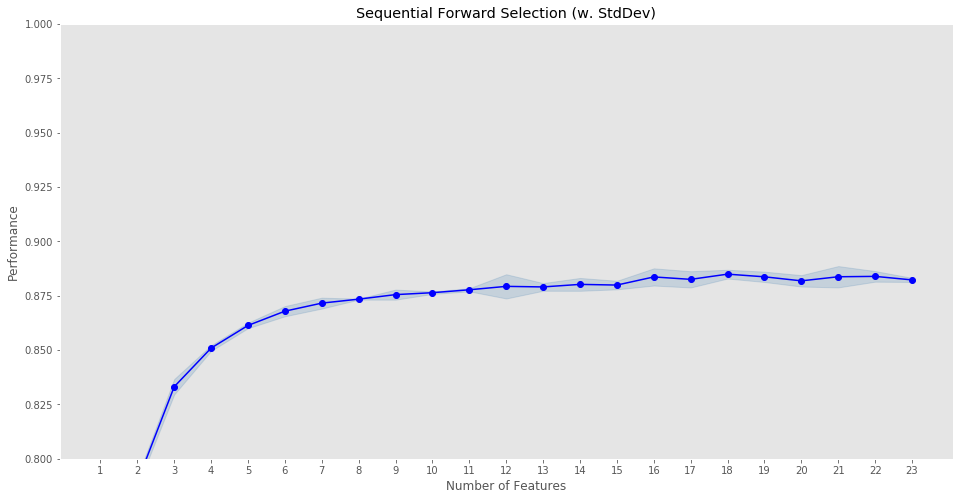

In [98]:
sfs = sfs(clf, 
          k_features=23, 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          verbose=2,
          cv=3)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

- From the plot above about 11 features are able to explain significantly changes in the dependent variable
- This implies that some of the features are redundant

### Building the Model with Selected Features only

In [100]:
clf =  BaggingClassifier(n_estimators=18)
clf.fit(X_train[:, feat_cols], y_train)

y_train_pred = clf.predict(X_train[:, feat_cols])
print('Training accuracy on selected features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test[:, feat_cols])
print('Testing accuracy on selected features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on selected features: 0.997
Testing accuracy on selected features: 0.922


### Building the Model with ALL features for comparison

In [101]:
clf = BaggingClassifier(n_estimators=18)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
print('Training accuracy on all features: %.3f' % acc(y_train, y_train_pred))

y_test_pred = clf.predict(X_test)
print('Testing accuracy on all features: %.3f' % acc(y_test, y_test_pred))

Training accuracy on all features: 0.998
Testing accuracy on all features: 0.924


- Building the model with just 15 features yield an accuracy of over 90% about the same level of accuracy as using all features
- This implies that 15 features out of the 23 features significantly explain the variance in the dependent variable
- 8 of the features are generally redundant using the Bagging classifier

### Feature Importance and Selection with Random Forest 

In [103]:
rf = RandomForestClassifier(n_estimators=450)
#rf_params = {'n_estimators': np.arange(50,500,50)}
#rf_grid = RandomizedSearchCV(rf, param_distributions=rf_params, refit=True)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(rf.feature_importances_)

[0.06210186 0.0112634  0.02048472 0.01277407 0.06271525 0.10038758
 0.0422186  0.02894332 0.02087571 0.01905668 0.01759456 0.06199052
 0.05426511 0.05048378 0.04965547 0.0490481  0.04923706 0.0522107
 0.05150518 0.04836266 0.04455761 0.04389956 0.0463685 ]


In [104]:
# Selecting Features from the dataset to feed into the model
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [105]:
data.columns.get_loc('PAY_AMT6')

22

In [106]:
data1 = data.iloc[:,0:23]

In [107]:
data1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [108]:
#Extract feature names from the data
feat = data1.keys()
feat_labels = feat.get_values()

In [109]:
#feat round(number[, ndigits]) -> number

In [110]:
featimp = pd.DataFrame({'Feature':feat_labels, 'Feature importance':rf.feature_importances_})
featimp = featimp.sort_values(by='Feature importance', ascending=False)
featimp

,Feature,Feature importance
5,PAY_0,0.100388
4,AGE,0.062715
0,LIMIT_BAL,0.062102
11,BILL_AMT1,0.061991
12,BILL_AMT2,0.054265
17,PAY_AMT1,0.052211
18,PAY_AMT2,0.051505
13,BILL_AMT3,0.050484
14,BILL_AMT4,0.049655
16,BILL_AMT6,0.049237


In [136]:
#for feature in zip(feat_labels, rf.feature_importances_):
#    print(feature)

## Features Importance Analysis

**From the above table:**

- The latest credit card payment (PAY_0) is the strongest driver whether a borrower defaults or not.
- Age, Limit_Bal and Bill_Amt1(the latest Bill amount) are the strongest drivers whether a borrower defaults or not.
- Sex, Marriage, least recent payments (Pay_5, Pay_6, etc) and Education are least likely to influence a borrower's ability to pay

## Analysis of Coefficients

In [122]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [118]:
log = LogisticRegression(fit_intercept = False, C=10)
fitm = log.fit(X_train, y_train)
log.coef_

array([[-0.10977135, -0.06881949, -0.07086903, -0.08121412,  0.07728664,
         0.66866077,  0.11685571,  0.09392852,  0.01218743,  0.03716405,
        -0.02544657, -0.34646903,  0.13104036,  0.10460286, -0.04311545,
         0.08735401, -0.0118646 , -0.20625624, -0.19033779, -0.03948668,
        -0.03702675, -0.03665665, -0.02033896]])

- Generally, the higher the payments, the lower the lower the likelihood of default 
- The higher the bill amount, the higher the likelihood of default.

## Predicting Probabilities of Default of a Single borrower and Class (X_test)

### Using Logistic Regression

In [16]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#### Multiple Instances (many borrowers) Class Prediction

In [17]:
y_pred_lr

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [18]:
# Writing to csv file to view the long list
predictionlr = pd.DataFrame(y_pred_lr, columns=['Predictions']).to_csv('prediction.csv')

#### Multiple Instances (many borrowers) Probability Prediction

In [19]:
pred_prob = lr.predict_proba(X_test)

In [20]:
pred_prob

array([[0.4933426 , 0.5066574 ],
       [0.52619857, 0.47380143],
       [0.6520401 , 0.3479599 ],
       ...,
       [0.31015503, 0.68984497],
       [0.30956711, 0.69043289],
       [0.2558156 , 0.7441844 ]])

In [21]:
# Writing to csv file to view the long list
predictionprob = pd.DataFrame(pred_prob, columns=['NoDefault','Default']).to_csv('predprobabilities.csv')

#### Single Instance (1 borrower) Class Prediction

In [22]:
Xnew = [[500000,2,2,2,21,-1,-2,2,0,0,2,400000,450000,500000,600000,490000,485000,70000,35000,40000,21000,16000,15000]]

In [23]:
Xnew = scaler.transform(Xnew)

In [32]:
ynew = lr.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[ 2.74055831  0.83450794  0.17518767  0.87307792 -1.55092458 -0.9722292
 -1.54596886  1.48105007  0.04492091  0.08891128  1.66493701  4.73225752
  5.61519972  6.60247599  8.63083743  7.35242237  7.4645013   4.32013596
  1.65084726  2.2120604   1.17941145  0.8398235   0.61540601], Predicted=0


#### Single Instance (1 borrower) Probability Prediction

In [31]:
ynew = lr.predict_proba(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[ 2.74055831  0.83450794  0.17518767  0.87307792 -1.55092458 -0.9722292
 -1.54596886  1.48105007  0.04492091  0.08891128  1.66493701  4.73225752
  5.61519972  6.60247599  8.63083743  7.35242237  7.4645013   4.32013596
  1.65084726  2.2120604   1.17941145  0.8398235   0.61540601], Predicted=[0.93675677 0.06324323]


#### Further Example

In [26]:
Xnew1 = [[20000,1,1,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,0,0,0,0,0]]

In [27]:
Xnew1 = scaler.transform(Xnew1)

In [33]:
ynew1 = lr.predict(Xnew1)
print("X=%s, Predicted=%s" % (Xnew1[0], ynew1[0]))

X=[-1.0663881  -1.19831094 -1.12972776 -1.03988793 -1.2308731   1.39240099
  1.42186454 -0.76533099 -0.71671343 -1.47259448 -1.43479644 -0.63299717
 -0.64107069 -0.66911861 -0.66937658 -0.66038512 -0.65303942 -0.32486237
 -0.27492333 -0.28580798 -0.30044002 -0.30148018 -0.27903449], Predicted=1


In [29]:
ynew1 = lr.predict_proba(Xnew1)
print("X=%s, Predicted=%s" % (Xnew1[0], ynew1[0]))

X=[-1.0663881  -1.19831094 -1.12972776 -1.03988793 -1.2308731   1.39240099
  1.42186454 -0.76533099 -0.71671343 -1.47259448 -1.43479644 -0.63299717
 -0.64107069 -0.66911861 -0.66937658 -0.66038512 -0.65303942 -0.32486237
 -0.27492333 -0.28580798 -0.30044002 -0.30148018 -0.27903449], Predicted=[0.18796158 0.81203842]


### Using Random Forest

In [35]:
rf = RandomForestClassifier(n_estimators=400)
rf.fit(X_train, y_train)
y_pred_rf = lr.predict(X_test)

#### Single Instance (1 borrower) Class Prediction

In [36]:
Xnew = [[500000,2,2,2,21,-1,-2,2,0,0,2,400000,450000,500000,600000,490000,485000,70000,35000,40000,21000,16000,15000]]

In [37]:
Xnew = scaler.transform(Xnew)

In [38]:
ynew = rf.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[ 2.74055831  0.83450794  0.17518767  0.87307792 -1.55092458 -0.9722292
 -1.54596886  1.48105007  0.04492091  0.08891128  1.66493701  4.73225752
  5.61519972  6.60247599  8.63083743  7.35242237  7.4645013   4.32013596
  1.65084726  2.2120604   1.17941145  0.8398235   0.61540601], Predicted=0


#### Single Instance (1 borrower) Probability Prediction

In [39]:
ynew = rf.predict_proba(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[ 2.74055831  0.83450794  0.17518767  0.87307792 -1.55092458 -0.9722292
 -1.54596886  1.48105007  0.04492091  0.08891128  1.66493701  4.73225752
  5.61519972  6.60247599  8.63083743  7.35242237  7.4645013   4.32013596
  1.65084726  2.2120604   1.17941145  0.8398235   0.61540601], Predicted=[0.7825 0.2175]


#### Further Example

In [40]:
Xnew1 = [[20000,1,1,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,0,0,0,0,0]]

In [41]:
Xnew1 = scaler.transform(Xnew1)

In [42]:
ynew1 = rf.predict(Xnew1)
print("X=%s, Predicted=%s" % (Xnew1[0], ynew1[0]))

X=[-1.0663881  -1.19831094 -1.12972776 -1.03988793 -1.2308731   1.39240099
  1.42186454 -0.76533099 -0.71671343 -1.47259448 -1.43479644 -0.63299717
 -0.64107069 -0.66911861 -0.66937658 -0.66038512 -0.65303942 -0.32486237
 -0.27492333 -0.28580798 -0.30044002 -0.30148018 -0.27903449], Predicted=1


In [43]:
ynew1 = rf.predict_proba(Xnew1)
print("X=%s, Predicted=%s" % (Xnew1[0], ynew1[0]))

X=[-1.0663881  -1.19831094 -1.12972776 -1.03988793 -1.2308731   1.39240099
  1.42186454 -0.76533099 -0.71671343 -1.47259448 -1.43479644 -0.63299717
 -0.64107069 -0.66911861 -0.66937658 -0.66038512 -0.65303942 -0.32486237
 -0.27492333 -0.28580798 -0.30044002 -0.30148018 -0.27903449], Predicted=[0.1425 0.8575]


** As expected, using both logistic regression and random forest, a customer not making payments (last five zeros) on her credit card is predicted to default (Class 1) with a probability of 81% (by logistic regression) and 86% (by random forest) whereas a customer making payments on her credit card is predicted not to default (Class 0) with a probability of about 94% (by LR)  and almost 80% (by RF) even though this customer is carrying a higher limit balance (500,000 vs. 20,000).**